In [1]:
import os
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

# from scripts.preprocessing import preprocess_data


In [2]:
os.chdir("../")

In [3]:
# train_data = pd.read_csv("data/rossmann/train.csv")
# store_data = pd.read_csv("data/rossmann/store.csv")

In [4]:
# df = pd.merge(train_data, store_data, on='Store')


In [5]:
# from scripts.preprocessing import preprocess_data


# df, label_encoders, scaler = preprocess_data(df)



In [6]:
# df.to_csv("data/cleandata.csv")

In [7]:
df = pd.read_csv("data/cleandata.csv")

In [8]:
# # Handle infinite and NaN values in X
# X = df.drop(columns=['Sales'])  # Drop the 'Sales' column to use the remaining as features
# X = X.replace([np.inf, -np.inf], np.nan)  # Replace infinity values with NaN
# X = X.fillna(X.mode())  # Fill NaN values with the mode of the column

# y = df['Sales']  # Target variable

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define numerical and categorical columns
# numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
# categorical_cols = X_train.select_dtypes(include=['object']).columns  # Identify string columns

# # Define preprocessor with ColumnTransformer
# preprocessor = ColumnTransformer(transformers=[
#     ('num', StandardScaler(), numerical_cols),  # Scale numerical columns
#     ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # OneHotEncode categorical columns
# ])

# # Build a pipeline with preprocessor and RandomForestRegressor
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),  # Preprocess both numerical and categorical features
#     ('regressor', RandomForestRegressor(random_state=42))  # RandomForest model
# ])

# # Train the model
# pipeline.fit(X_train, y_train)

# # Predict on the test set
# y_pred = pipeline.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# rmse = math.sqrt(mse)

# # Output the results

# print("Root Mean Squared Error (RMSE):", rmse)
# print(f'Mean Squared Error (MSE): {mse}')
# print(f'R² Score: {r2}')


In [9]:
# from sklearn.inspection import permutation_importance

# # Calculate permutation importance
# results = permutation_importance(pipeline, X_test, y_test, n_repeats=30, random_state=42)

# # Create a DataFrame to store feature importances
# feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': results.importances_mean})

# # Sort features by importance in descending order
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

NameError: name 'pipeline' is not defined

In [12]:
# import datetime
# import pickle

# model_filename = f"data/model_{datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S')}.pkl"
# with open(model_filename, 'wb') as file:
#     pickle.dump(pipeline, file)

In [9]:
# with open(model_filename, 'rb') as file:
#     loaded_model = pickle.load(file)

# new_data = pd.read_csv("data/test.csv   ")
# predictions = loaded_model.predict(new_data)

In [10]:
import pandas as pd

# Load dataset
df = pd.read_csv('data/cleandata.csv', parse_dates=['Date'])  # Parse 'Date' as datetime format

# Ensure 'Date' is the index and properly sorted
df = df.set_index('Date').sort_index()

# Isolate data for a specific store
store_id = 1  # Select a store ID
store_data = df[df['Store'] == store_id]

# Resample the sales data to get daily sales (you can also use 'W' for weekly, 'M' for monthly)
store_sales = store_data['Sales'].resample('D').sum()

# Print the result to verify
print(store_sales.head())


Date
2013-01-01       0.0
2013-01-02    5530.0
2013-01-03    4327.0
2013-01-04    4486.0
2013-01-05    4997.0
Freq: D, Name: Sales, dtype: float64


In [11]:
from statsmodels.tsa.stattools import adfuller

# ADF test for stationarity
result = adfuller(store_sales.dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -4.368104368168502
p-value: 0.00033788346141423953


In [12]:
# Differencing the data to make it stationary
store_sales_diff = store_sales.diff().dropna()


<Figure size 1200x600 with 0 Axes>

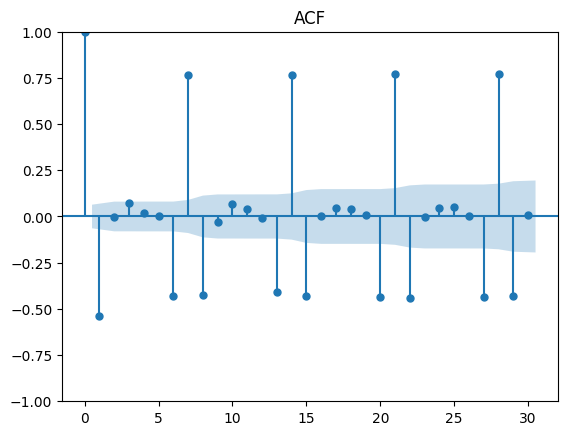

<Figure size 1200x600 with 0 Axes>

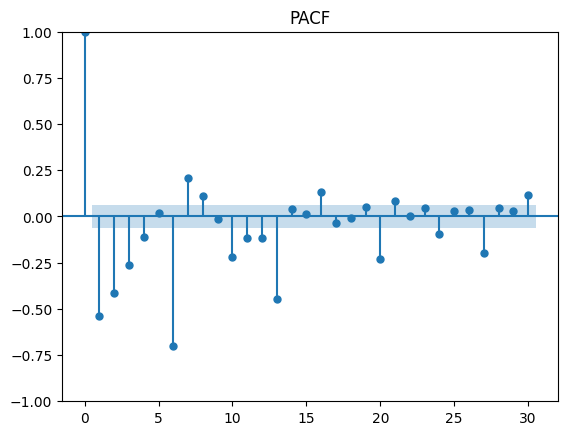

In [13]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plot_acf(store_sales_diff, lags=30)
plt.title('ACF')

plt.figure(figsize=(12, 6))
plot_pacf(store_sales_diff, lags=30)
plt.title('PACF')
plt.show()


In [14]:
def create_lagged_features(series, lag=1):
    X, y = [], []
    for i in range(len(series) - lag):
        X.append(series[i:i + lag])
        y.append(series[i + lag])
    return np.array(X), np.array(y)

# Convert sales data into sliding window data
lag = 7  # Look back 7 days
X, y = create_lagged_features(store_sales_diff.values, lag=lag)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X = X_train
y = y_train

In [22]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming X and y are already defined as numpy arrays

# Initialize separate scalers
scaler_X = MinMaxScaler(feature_range=(-1, 1))
scaler_y = MinMaxScaler(feature_range=(-1, 1))

# Reshape y into a 2D array (if it's a 1D array) since MinMaxScaler expects 2D input for fitting
y_reshaped = y.reshape(-1, 1)

# Scale X and y using separate scalers
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y_reshaped)

# Now y_scaled is in the same range (-1, 1)
# Continue with your modeling steps


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape the data for LSTM
X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_scaled.shape[1], 1), return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_scaled, y_scaled, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20


C:\Users\windows 10\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.1232 - val_loss: 0.0983
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1006 - val_loss: 0.0648
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0661 - val_loss: 0.0584
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0635 - val_loss: 0.0516
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0569 - val_loss: 0.0449
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0533 - val_loss: 0.0493
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0495 - val_loss: 0.0428
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0484 - val_loss: 0.0489
Epoch 9/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0502 - val_loss: 0.0396
Epoch 10/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0413 - val_loss: 0.0417
Epoch 11/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0414 - val_loss: 0.0410
Epoch 12/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0426 - val_l

In [32]:
# Option 1: Reshape before inverse transform
y_pred = scaler_y.inverse_transform(y_train.reshape(-1, 1))

# Option 2: Reshape after inverse transform
# y_pred = scaler_y.inverse_transform(y_test)
y_pred = y_pred.flatten()  # Reshape back to 1D if needed

Root Mean Squared Error (RMSE): 0.0
Mean Squared Error (MSE): 0.0
R² Score: 1.0


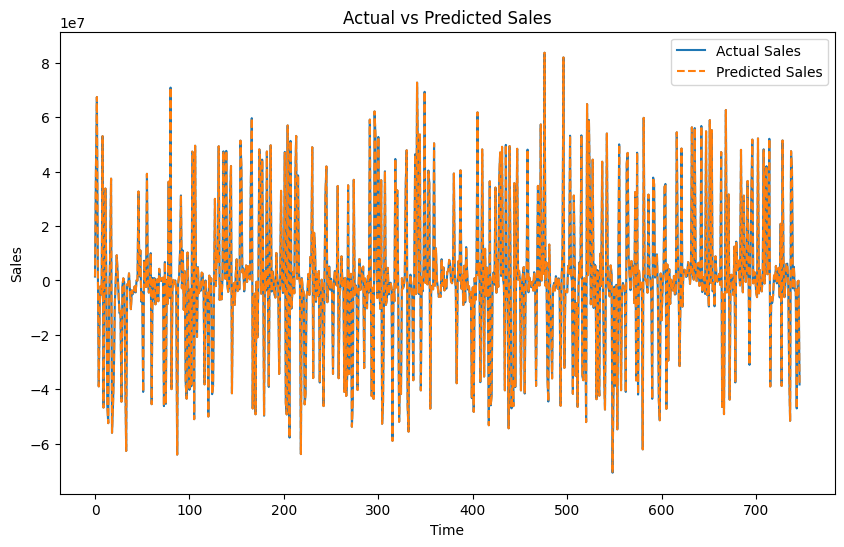

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have a scaler for y values (scaler_y)

# Use the test set for evaluation
# y_pred = scaler_y.inverse_transform(y_test)  # Predict on test data
# y_test_original = scaler_y.inverse_transform(y_test)  # Invert scaling for test data

# Ensure predictions and actual values are 1D arrays (flatten if needed)
# y_pred = y_pred.flatten()
y_test_original = y_pred.flatten()

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
mse = mean_squared_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Plot actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label="Actual Sales")
plt.plot(y_pred, label="Predicted Sales", linestyle='--')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()